## Data620 Assignment 3
###### Team Member: Mia Chen / Wei Zhou 
###### Date: 06/14/2020

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

### Load a graph database
of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.

In [2]:
df = pd.read_table("facebook_combined.txt", sep = " ", names = ['source','target'])

/Users/zhouw/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [3]:
df.head()

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [4]:
fb=nx.read_edgelist('facebook_combined.txt',create_using=nx.DiGraph(),nodetype=int)

### Graph Analysis
Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.

In [5]:
G = nx.from_pandas_edgelist(df)
print( nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


##### Diameters

In [6]:
G_subset = nx.from_pandas_edgelist(df[300:400])
nx.algorithms.diameter(G_subset)

8

#### Basic network analysis - degree distribution
If a network is directed, meaning that edges point in one direction from one node to another node, then nodes have two different degrees, the in-degree, which is the number of incoming edges, and the out-degree, which is the number of outgoing edges.

Text(0.5,1,'Facebook users network')

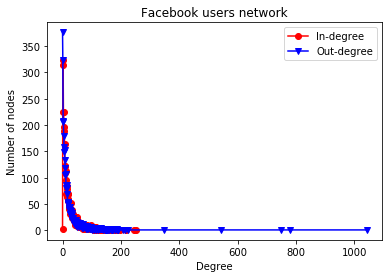

In [7]:
in_degrees = dict(fb.in_degree()) # dictionary node:degree
in_values = sorted(set(in_degrees.values()))
in_hist = [in_degrees.values().count(x) for x in in_values]

out_degrees = dict(fb.out_degree()) # dictionary node:degree
out_values = sorted(set(out_degrees.values()))
out_hist = [out_degrees.values().count(x) for x in out_values]

plt.figure()
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.plot(out_values,out_hist,'bv-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Facebook users network')

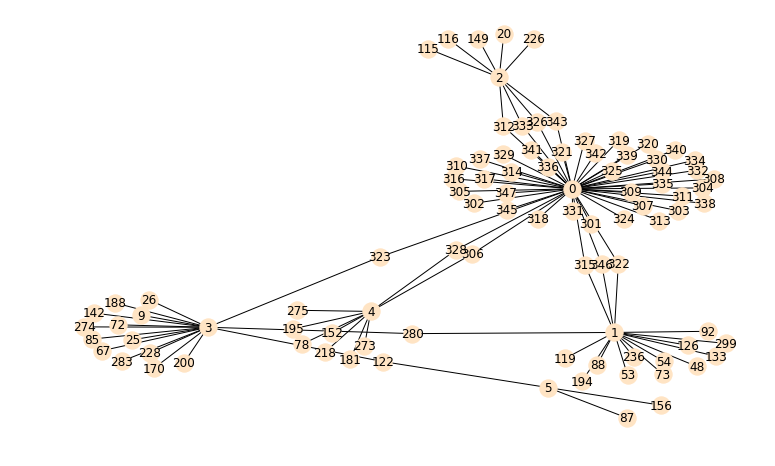

In [8]:

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
nx.draw(G_subset, node_color='bisque', with_labels=True)